# Air Temperature and COVID-19 Infection rate

#### this is a study to show the relation between covid-19 new cases count and weather as many would like to think that hot weather help to reduce infection risk significantly, despite the fact that many medical institutions denied such a claim many still think that hot weather is a great factor when it comes to covid-19 
#### this study used weather data and new cases count of two major US cities "New York and Los Angeles" to find the correlation between the air temperature and covid-19 new cases in a relatively same other conditions "same country so economic factor is slightly eliminated" 

### Loading libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sns.set_style('dark')
sns.set_palette('bright')

## Loading datasets

### NYC COVID-19 data
#### for more info: https://data.cityofnewyork.us/Health/COVID-19-Daily-Counts-of-Cases-Hospitalizations-an/rc75-m7u3

In [2]:
df_cr = pd.read_csv('COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths .csv')
df_cr

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,02/29/2020 12:00:00 AM,1,11,0
1,03-01-20 0:00,0,4,0
2,03-02-20 0:00,0,21,0
3,03-03-20 0:00,2,20,0
4,03-04-20 0:00,5,22,0
...,...,...,...,...
167,08/14/2020 12:00:00 AM,197,32,1
168,08/15/2020 12:00:00 AM,90,22,4
169,08/16/2020 12:00:00 AM,73,16,3
170,08/17/2020 12:00:00 AM,67,2,0


### LA COVID-19 data
#### for more info: https://data.ca.gov/dataset/covid-19-cases

In [3]:
df_crla = pd.read_csv('LA_statewide_cases.csv')
df_crla

,county,cases,death,date
0,Santa Clara,151,6,18-03-20
1,Santa Clara,32,2,19-03-20
2,Santa Clara,63,0,20-03-20
3,Santa Clara,23,2,21-03-20
4,Santa Clara,15,3,22-03-20
...,...,...,...,...
9120,Yolo,17,0,13-08-20
9121,Yolo,53,1,14-08-20
9122,Yolo,40,0,15-08-20
9123,Yolo,26,0,16-08-20


### NY and LA weather data
#### for more info: https://www.ncdc.noaa.gov/cdo-web/datasets

In [4]:
df_wn = pd.read_csv('NOAA_nyweather_central_park.csv')
df_wn

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US","Thursday, 20 February, 2020",NaN,1.7,-3.2
1,USW00094728,"NY CITY CENTRAL PARK, NY US","Friday, 21 February, 2020",NaN,1.7,-6.6
2,USW00094728,"NY CITY CENTRAL PARK, NY US","Saturday, 22 February, 2020",NaN,10.0,-1.0
3,USW00094728,"NY CITY CENTRAL PARK, NY US","Sunday, 23 February, 2020",NaN,13.3,3.9
4,USW00094728,"NY CITY CENTRAL PARK, NY US","Monday, 24 February, 2020",NaN,16.7,5.0
...,...,...,...,...,...,...
174,USW00094728,"NY CITY CENTRAL PARK, NY US","Wednesday, 12 August, 2020",NaN,32.2,22.2
175,USW00094728,"NY CITY CENTRAL PARK, NY US","Thursday, 13 August, 2020",NaN,26.1,22.2
176,USW00094728,"NY CITY CENTRAL PARK, NY US","Friday, 14 August, 2020",NaN,30.0,22.8
177,USW00094728,"NY CITY CENTRAL PARK, NY US","Saturday, 15 August, 2020",NaN,28.9,21.7


In [5]:
df_wla = pd.read_csv('NOAA_LAweather.csv')
df_wla

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US","Thursday, 20 February, 2020",NaN,27.2,11.1
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US","Friday, 21 February, 2020",NaN,26.7,14.4
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US","Saturday, 22 February, 2020",NaN,18.9,15.0
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US","Sunday, 23 February, 2020",NaN,20.0,11.7
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US","Monday, 24 February, 2020",NaN,21.7,11.1
...,...,...,...,...,...,...
174,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US","Wednesday, 12 August, 2020",NaN,30.0,15.6
175,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US","Thursday, 13 August, 2020",NaN,31.1,18.9
176,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US","Friday, 14 August, 2020",NaN,33.9,21.1
177,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US","Saturday, 15 August, 2020",NaN,36.7,22.8


## Cleaning datasets


In [6]:
df_cr.columns = ['DATE', 'cases', 'HOSPITALIZED', 'DEATH']
df_cr.drop(columns='HOSPITALIZED', inplace= True)
df_cr.columns = list(map(lambda i : i.lower() , df_cr.columns))

In [7]:
df_cr['cases'] = df_cr['cases'].str.replace(',','') 
df_cr['cases'] = df_cr['cases'].astype(int)
df_cr

,date,cases,death
0,02/29/2020 12:00:00 AM,1,0
1,03-01-20 0:00,0,0
2,03-02-20 0:00,0,0
3,03-03-20 0:00,2,0
4,03-04-20 0:00,5,0
...,...,...,...
167,08/14/2020 12:00:00 AM,197,1
168,08/15/2020 12:00:00 AM,90,4
169,08/16/2020 12:00:00 AM,73,3
170,08/17/2020 12:00:00 AM,67,0


In [8]:
df_crla = df_crla[df_crla['county'] == 'Los Angeles']
df_crla.drop(columns=['county'], inplace= True)
df_crla

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,cases,death,date
6677,47,0,"Wednesday, 18 March, 2020"
6678,186,0,"Thursday, 19 March, 2020"
6679,34,1,"Friday, 20 March, 2020"
6680,55,1,"Saturday, 21 March, 2020"
6681,62,1,"Sunday, 22 March, 2020"
...,...,...,...
6825,1955,62,"Thursday, 13 August, 2020"
6826,2586,43,"Friday, 14 August, 2020"
6827,1960,31,"Saturday, 15 August, 2020"
6828,1193,9,"Sunday, 16 August, 2020"


In [9]:
df_wn.drop(columns = ['NAME','STATION'],inplace =True)
df_wn.columns = list(map(lambda x:  x.lower(), df_wn.columns))
df_wn

,date,tavg,tmax,tmin
0,"Thursday, 20 February, 2020",NaN,1.7,-3.2
1,"Friday, 21 February, 2020",NaN,1.7,-6.6
2,"Saturday, 22 February, 2020",NaN,10.0,-1.0
3,"Sunday, 23 February, 2020",NaN,13.3,3.9
4,"Monday, 24 February, 2020",NaN,16.7,5.0
...,...,...,...,...
174,"Wednesday, 12 August, 2020",NaN,32.2,22.2
175,"Thursday, 13 August, 2020",NaN,26.1,22.2
176,"Friday, 14 August, 2020",NaN,30.0,22.8
177,"Saturday, 15 August, 2020",NaN,28.9,21.7


In [10]:
df_wla.drop(columns = ['NAME','STATION'],inplace =True)
df_wla.columns = list(map(lambda x:  x.lower(), df_wla.columns))
df_wla

,date,tavg,tmax,tmin
0,"Thursday, 20 February, 2020",NaN,27.2,11.1
1,"Friday, 21 February, 2020",NaN,26.7,14.4
2,"Saturday, 22 February, 2020",NaN,18.9,15.0
3,"Sunday, 23 February, 2020",NaN,20.0,11.7
4,"Monday, 24 February, 2020",NaN,21.7,11.1
...,...,...,...,...
174,"Wednesday, 12 August, 2020",NaN,30.0,15.6
175,"Thursday, 13 August, 2020",NaN,31.1,18.9
176,"Friday, 14 August, 2020",NaN,33.9,21.1
177,"Saturday, 15 August, 2020",NaN,36.7,22.8


### using day average to fill nulls in temp avg columns


In [11]:
df_wn['tavg'] = (df_wn['tmax'] + df_wn['tmin'] ) / 2
df_wn

,date,tavg,tmax,tmin
0,"Thursday, 20 February, 2020",-0.75,1.7,-3.2
1,"Friday, 21 February, 2020",-2.45,1.7,-6.6
2,"Saturday, 22 February, 2020",4.50,10.0,-1.0
3,"Sunday, 23 February, 2020",8.60,13.3,3.9
4,"Monday, 24 February, 2020",10.85,16.7,5.0
...,...,...,...,...
174,"Wednesday, 12 August, 2020",27.20,32.2,22.2
175,"Thursday, 13 August, 2020",24.15,26.1,22.2
176,"Friday, 14 August, 2020",26.40,30.0,22.8
177,"Saturday, 15 August, 2020",25.30,28.9,21.7


In [12]:
df_wla['tavg'] = (df_wla['tmax'] + df_wla['tmin'] ) / 2
df_wla

,date,tavg,tmax,tmin
0,"Thursday, 20 February, 2020",19.15,27.2,11.1
1,"Friday, 21 February, 2020",20.55,26.7,14.4
2,"Saturday, 22 February, 2020",16.95,18.9,15.0
3,"Sunday, 23 February, 2020",15.85,20.0,11.7
4,"Monday, 24 February, 2020",16.40,21.7,11.1
...,...,...,...,...
174,"Wednesday, 12 August, 2020",22.80,30.0,15.6
175,"Thursday, 13 August, 2020",25.00,31.1,18.9
176,"Friday, 14 August, 2020",27.50,33.9,21.1
177,"Saturday, 15 August, 2020",29.75,36.7,22.8


### converting date column to datetime format 

In [13]:
df_cr.date = pd.to_datetime(df_cr.date)
df_wn.date = pd.to_datetime(df_wn.date)
df_wla.date = pd.to_datetime(df_wla.date)
df_crla.date = pd.to_datetime(df_crla.date)

C:\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### setting the index to date columns in both data sets

In [14]:
df_wn.set_index('date',inplace= True)
df_cr.set_index('date',inplace= True)
df_crla.set_index('date',inplace= True)
df_wla.set_index('date',inplace= True)

### merging the datasets

#### New York Master Dataset 

In [15]:
df_msn = df_wn.merge(df_cr, how='inner', left_index= True, right_index=True)
df_msn = df_msn.iloc[18:,:]
df_msn

,tavg,tmax,tmin,cases,death
date,,,,,
2020-03-18,8.60,12.2,5.0,2984,21
2020-03-19,8.05,11.1,5.0,3715,24
2020-03-20,16.65,25.0,8.3,4014,47
2020-03-21,11.35,18.3,4.4,2640,44
2020-03-22,3.90,7.2,0.6,2580,50
...,...,...,...,...,...
2020-08-12,27.20,32.2,22.2,290,2
2020-08-13,24.15,26.1,22.2,237,2
2020-08-14,26.40,30.0,22.8,197,1


#### Los Angeles  Master Dataset 

In [16]:
df_msla = df_wla.merge(df_crla, how='inner', left_index= True, right_index=True)
df_msla

,tavg,tmax,tmin,cases,death
date,,,,,
2020-03-18,13.60,18.3,8.9,47,0
2020-03-19,14.20,17.8,10.6,186,0
2020-03-20,15.55,18.9,12.2,34,1
2020-03-21,16.70,20.6,12.8,55,1
2020-03-22,17.50,23.3,11.7,62,1
...,...,...,...,...,...
2020-08-12,22.80,30.0,15.6,2121,52
2020-08-13,25.00,31.1,18.9,1955,62
2020-08-14,27.50,33.9,21.1,2586,43


### plotting tempreture and cases count for NYC

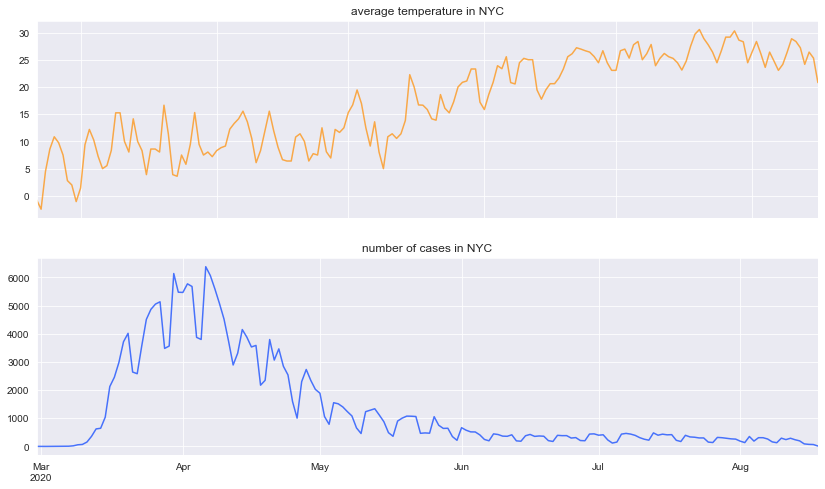

In [17]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,8))
df_wn.tavg.plot(ax=ax1, c= 'darkorange', alpha =.7,sharex=True)
ax1.set_title('average temperature in NYC')
df_cr.cases.plot(ax = ax2, alpha=.7)
ax1.grid()
ax2.set_title('number of cases in NYC')
ax2.xaxis.label.set_visible(False)
ax2.grid()
plt.show()

### overlay tempreture with cases count

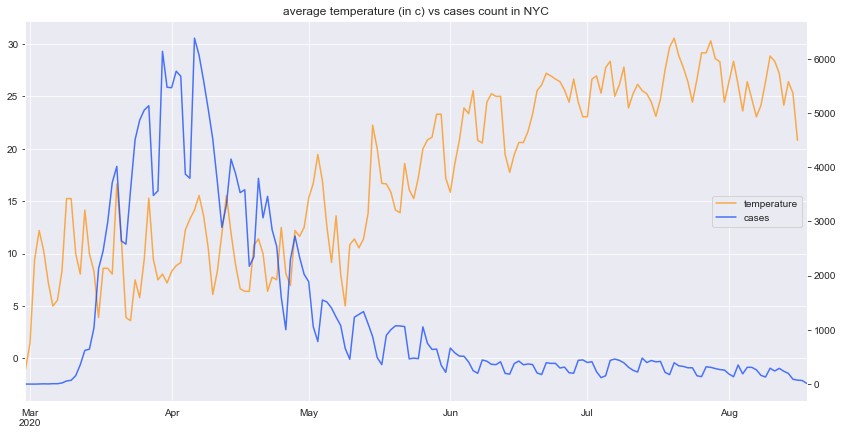

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(14,7))
df_wn.tavg.plot(ax=ax1, c= 'darkorange',alpha=.7, label ='temperature')
ax1.set_title('average temperature (in c) vs cases count in NYC')
plt.grid()
ax2 = ax1.twinx()
df_cr.cases.plot(ax = ax2, label= 'cases', alpha=.7)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=7)
ax1.xaxis.label.set_visible(False)
plt.show()

### plotting tempreture and cases count for LA

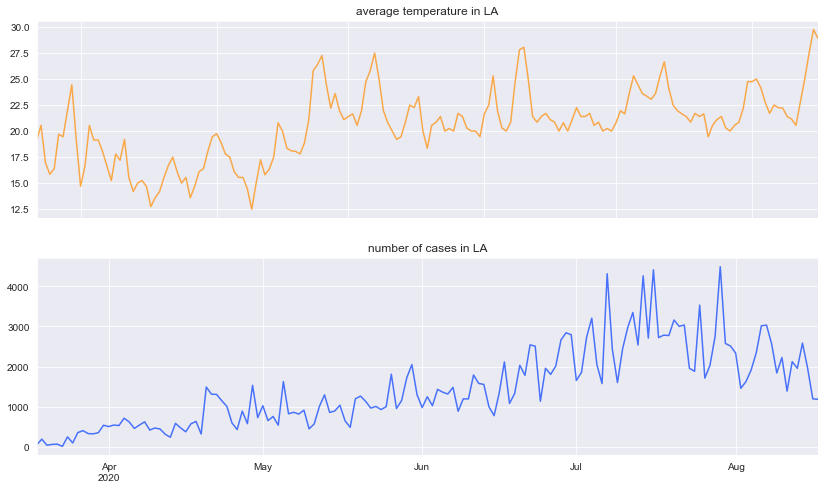

In [19]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,8))
df_wla.tavg.plot(ax=ax1, c= 'darkorange',alpha= .7,sharex=True)
ax1.set_title('average temperature in LA')
df_crla.cases.plot(ax = ax2, alpha=.7)
ax1.grid()
ax2.set_title('number of cases in LA')
ax2.xaxis.label.set_visible(False)
ax2.grid()
plt.show()

### overlay tempreture with cases count

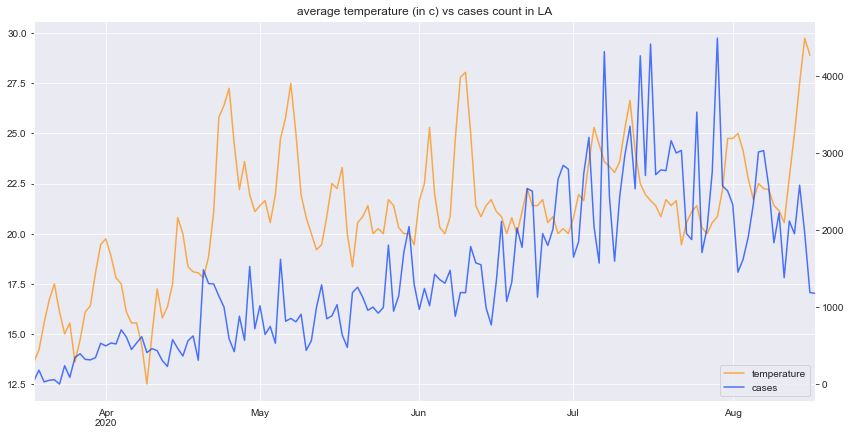

In [20]:
fig, ax1 = plt.subplots(1,1, figsize=(14,7))
df_wla.tavg.plot(ax=ax1, c= 'darkorange',alpha=.7, label ='temperature')
ax1.set_title('average temperature (in c) vs cases count in LA')
plt.grid()
ax2 = ax1.twinx()
df_crla.cases.plot(ax = ax2, label= 'cases', alpha=.7)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=4)
ax1.xaxis.label.set_visible(False)
plt.show()

### getting the correlation between weather and covid-19 cases count 

In [21]:
ncrr = round(df_msn.tavg.corr(df_msn.cases),3)
lacrr = round(df_msla.tavg.corr(df_msla.cases),3)

### plotting scatter plot of tempreture and cases

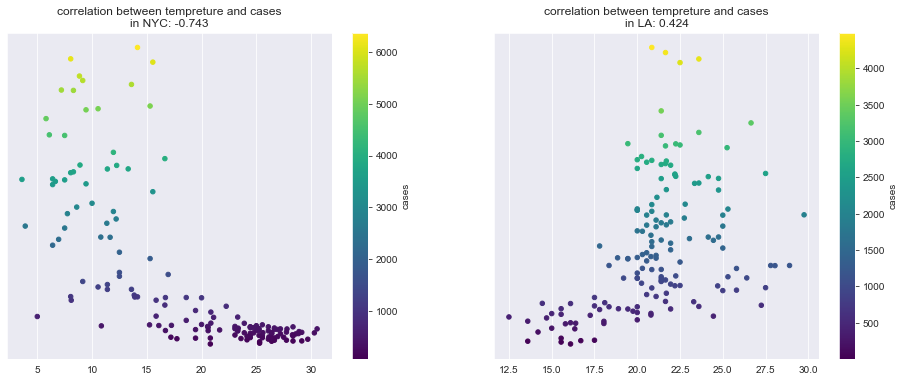

In [22]:
fig,(l,l2) = plt.subplots(1,2,figsize=(16,6))
df_msn.plot.scatter('tavg','cases',ax=l, c = 'cases', cmap='viridis', sharex=False)
l.title.set_text('correlation between tempreture and cases\nin NYC: {}'.format(ncrr))
l.yaxis.set_visible(False)
l.xaxis.label.set_visible(False)
l.grid()
df_msla.plot.scatter('tavg','cases',ax=l2 ,c = 'cases', cmap='viridis',sharex=False)
l2.grid()
l2.title.set_text('correlation between tempreture and cases\nin LA: {}'.format(lacrr))
l2.xaxis.label.set_visible(False)
l2.yaxis.set_visible(False)

plt.show()

### plotting a master figure

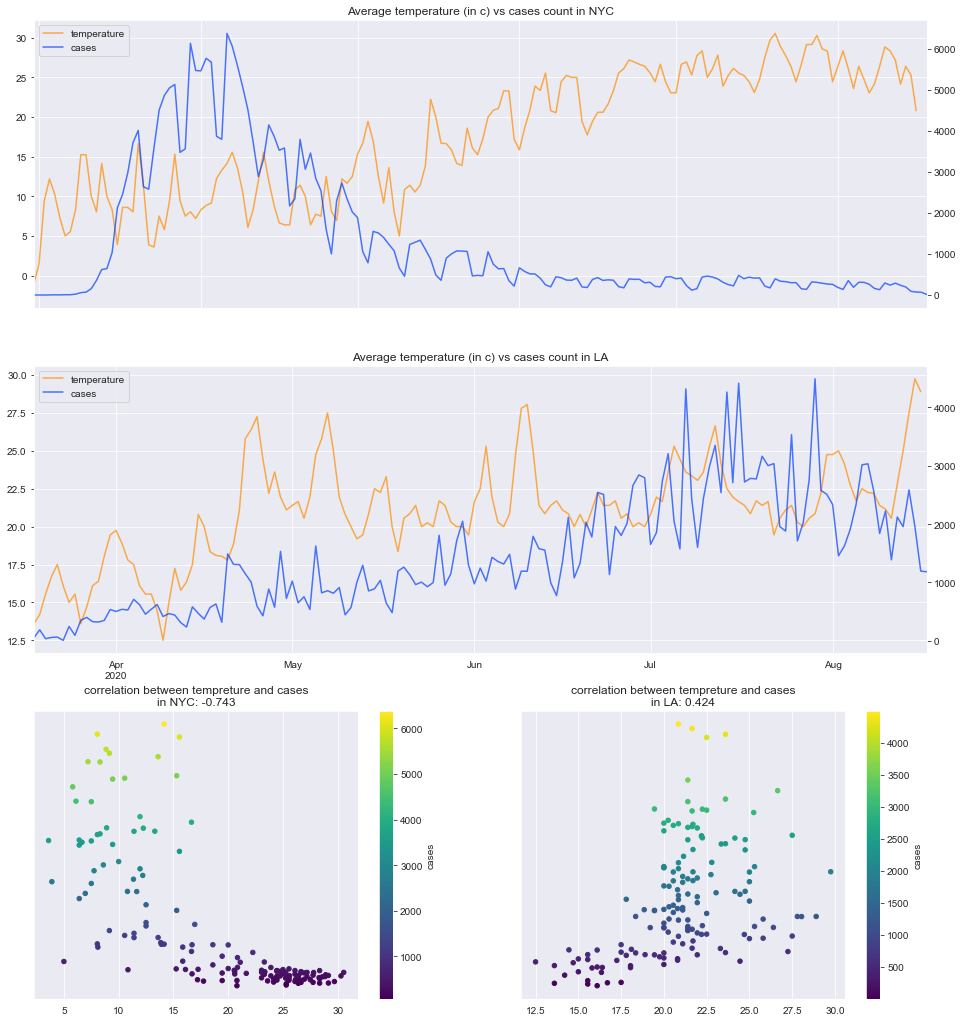

In [23]:
fig = plt.figure(figsize=(16,18))
grid = gridspec.GridSpec(3,2)

ax1 = fig.add_subplot(grid[0, :])

df_wn.tavg.plot(ax=ax1, c= 'darkorange',alpha=.7, label ='temperature')
ax1.set_title('Average temperature (in c) vs cases count in NYC')
plt.grid()
ax1a = ax1.twinx()
df_cr.cases.plot(ax = ax1a, label= 'cases', alpha=.7)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1a.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=2)
ax1.xaxis.label.set_visible(False)

ax2 = fig.add_subplot(grid[1, :])

df_wla.tavg.plot(ax=ax2, c= 'darkorange',alpha=.7, label ='temperature')
ax2.set_title('Average temperature (in c) vs cases count in LA')
plt.grid()
ax2a = ax2.twinx()
df_crla.cases.plot(ax = ax2a, label= 'cases', alpha=.7)
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2a.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=2)
ax2.xaxis.label.set_visible(False)

ax3 = fig.add_subplot(grid[2, 0])

l = df_msn.plot.scatter('tavg','cases',ax= ax3 ,c = 'cases', cmap='viridis', sharex=False)
plt.title('correlation between tempreture and cases\nin NYC: {}'.format(ncrr))
l.yaxis.set_visible(False)
l.xaxis.label.set_visible(False)
plt.grid()
ax4 = fig.add_subplot(grid[2, 1])

l = df_msla.plot.scatter('tavg','cases',ax= ax4, c = 'cases', cmap='viridis',sharex=False)
plt.grid()
plt.title('correlation between tempreture and cases\nin LA: {}'.format(lacrr))
l.xaxis.label.set_visible(False)
l.yaxis.set_visible(False)
plt.show()